## con distancia minima

--------------------------------------------------
VERIFICACIÓN DE CONDICIÓN DE CAMPO LEJANO (FRAUNHOFER)
  - Dimensión máxima de la rendija (L_max): 150.00 μm
  - Distancia mínima teórica:               4.23 cm
  - Distancia mínima recomendada (>10x):    42.29 cm
  - Tu distancia D actual:                  11.00 cm

  ⚠️ Condición de campo lejano CUMPLIDA, pero se recomienda una distancia mayor.
--------------------------------------------------

La gráfica con contraste mejorado ha sido guardada como 'simulacion_difraccion_contraste.png'


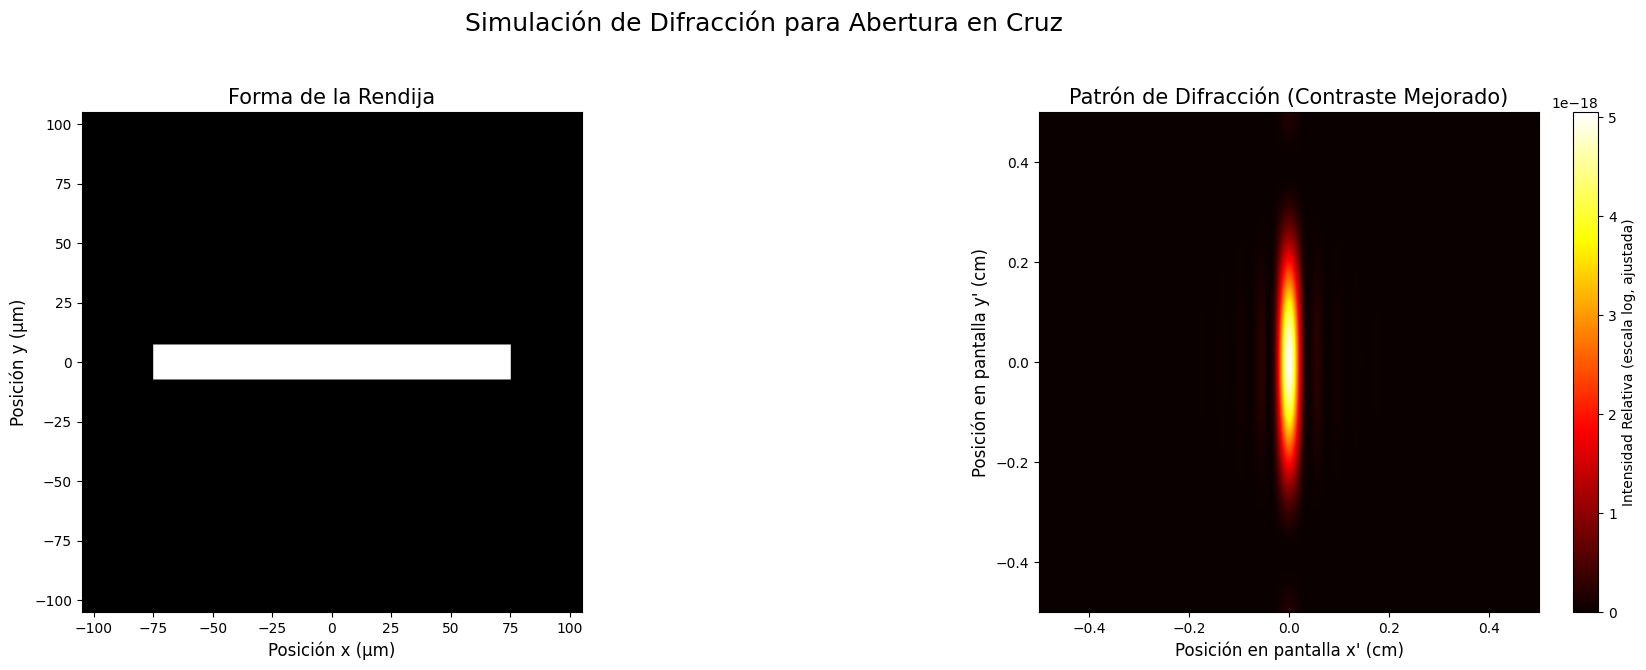

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_aperture(ax, L1, L2, h1, h2, t, e):
    """
    Dibuja la forma de la abertura de la cruz en un eje de matplotlib.
    """
    max_width = L1 + L2 + t
    max_height = h1 + h2 + e
    plot_limit = max(max_width, max_height) * 0.7
    
    x_tilde = np.linspace(-plot_limit, plot_limit, 400)
    y_tilde = np.linspace(-plot_limit, plot_limit, 400)
    X_tilde, Y_tilde = np.meshgrid(x_tilde, y_tilde)
    
    aperture_mask = np.zeros_like(X_tilde)
    
    horiz_bar = (X_tilde >= -(L1 + t/2)) & (X_tilde <= (L2 + t/2)) & \
                (Y_tilde >= -e/2) & (Y_tilde <= e/2)
    
    vert_bar = (X_tilde >= -t/2) & (X_tilde <= t/2) & \
               (Y_tilde >= -(h2 + e/2)) & (Y_tilde <= (h1 + e/2))
               
    aperture_mask[horiz_bar | vert_bar] = 1
    
    ax.imshow(aperture_mask, cmap='gray',
              extent=[x*1e6 for x in [-plot_limit, plot_limit, -plot_limit, plot_limit]])
    ax.set_title('Forma de la Rendija', fontsize=15)
    ax.set_xlabel('Posición x (μm)', fontsize=12)
    ax.set_ylabel('Posición y (μm)', fontsize=12)


def calculate_intensity(kx, ky, L1, L2, h1, h2, t, e):
    """
    Calcula la intensidad del patrón de difracción de Fraunhofer para una cruz.
    """
    k_eps = 1e-12
    kx = kx + k_eps
    ky = ky + k_eps
    W = L1 + t + L2
    H = h1 + e + h2
    
    sinc_Ax = np.sinc(kx * W / (2 * np.pi))
    sinc_Ay = np.sinc(ky * e / (2 * np.pi))
    phase_A = np.exp(-1j * kx * (L2 - L1) / 2)
    A = W * e * sinc_Ax * sinc_Ay * phase_A

    sinc_Bx = np.sinc(kx * t / (2 * np.pi))
    sinc_By = np.sinc(ky * H / (2 * np.pi))
    phase_B = np.exp(-1j * ky * (h1 - h2) / 2)
    B = t * H * sinc_Bx * sinc_By * phase_B

    sinc_Cx = np.sinc(kx * t / (2 * np.pi))
    sinc_Cy = np.sinc(ky * e / (2 * np.pi))
    C = t * e * sinc_Cx * sinc_Cy
    
    E_total = A + B - C
    intensity = np.abs(E_total)**2
    return intensity

## --- PARÁMETROS MODIFICABLES ---

# 1. Parámetros geométricos de la cruz (en metros)
L1 = 50e-6   # Longitud del brazo izquierdo
L2 = 50e-6   # Longitud del brazo derecho
h1 = 0e-6   # Longitud del brazo superior
h2 = 0e-6   # Longitud del brazo inferior
t = 50e-6    # Grosor de la barra VERTICAL
e = 15e-6     # Grosor de la barra HORIZONTAL

# 2. Parámetros de la luz y la pantalla (en metros)
lambda_ = 0.532e-6  # Longitud de onda (ej. láser verde)
D = 0.11           # Distancia de la rendija a la pantalla

# 3. Parámetros de la simulación
screen_size = 0.01  # Tamaño del área de visualización en la pantalla (m)
N_points = 512     # Resolución de la imagen (puntos por eje)

## --- VERIFICACIÓN DE CONDICIÓN DE CAMPO LEJANO ---

# Calcular la dimensión más grande de la abertura
W_total = L1 + t + L2
H_total = h1 + e + h2
L_max = max(W_total, H_total)

# Calcular distancias de campo lejano
dist_minima = (L_max**2) / lambda_
dist_recomendada = 10 * dist_minima

print("-" * 50)
print("VERIFICACIÓN DE CONDICIÓN DE CAMPO LEJANO (FRAUNHOFER)")
print(f"  - Dimensión máxima de la rendija (L_max): {L_max*1e6:.2f} μm")
print(f"  - Distancia mínima teórica:               {dist_minima*100:.2f} cm")
print(f"  - Distancia mínima recomendada (>10x):    {dist_recomendada*100:.2f} cm")
print(f"  - Tu distancia D actual:                  {D*100:.2f} cm")

if D >= dist_recomendada:
    print("\n  ✅ Condición de campo lejano recomendada CUMPLIDA.")
elif D >= dist_minima:
    print("\n  ⚠️ Condición de campo lejano CUMPLIDA, pero se recomienda una distancia mayor.")
else:
    print("\n  ❌ ADVERTENCIA: NO se cumple la condición de campo lejano.")
    print("     La simulación de Fraunhofer puede no ser físicamente precisa.")
print("-" * 50)


## --- CÁLCULO Y VISUALIZACIÓN ---

# Crear la malla de coordenadas en el plano de la pantalla (x', y')
x_prime = np.linspace(-screen_size / 2, screen_size / 2, N_points)
y_prime = np.linspace(-screen_size / 2, screen_size / 2, N_points)
X_prime, Y_prime = np.meshgrid(x_prime, y_prime)

# Convertir coordenadas a frecuencias espaciales (kx, ky)
kx = (2 * np.pi / (lambda_ * D)) * X_prime
ky = (2 * np.pi / (lambda_ * D)) * Y_prime

# Calcular el patrón de intensidad
intensity_pattern = calculate_intensity(kx, ky, L1, L2, h1, h2, t, e)

# --- Graficar ambos resultados ---


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Simulación de Difracción para Abertura en Cruz', fontsize=18)

# Gráfica 1: Forma de la rendija
plot_aperture(ax1, L1, L2, h1, h2, t, e)

# Gráfica 2: Patrón de difracción con contraste mejorado
log_intensity = np.log1p(intensity_pattern) # Calcula los datos logarítmicos primero

# Define el nivel máximo de brillo a mostrar (ej. 50% del máximo real)
# ¡Juega con este valor (0.5) para cambiar el contraste!
vmax_contrast = np.max(log_intensity) * 1

im = ax2.imshow(log_intensity, 
                cmap='hot',
                vmax=vmax_contrast, # Establece el límite superior de color
                extent=[-screen_size/2 * 100, screen_size/2 * 100, 
                        -screen_size/2 * 100, screen_size/2 * 100])

ax2.set_title('Patrón de Difracción (Contraste Mejorado)', fontsize=15)
ax2.set_xlabel("Posición en pantalla x' (cm)", fontsize=12)
ax2.set_ylabel("Posición en pantalla y' (cm)", fontsize=12)
fig.colorbar(im, ax=ax2, label='Intensidad Relativa (escala log, ajustada)', fraction=0.046, pad=0.04)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('simulacion_difraccion_contraste.png', dpi=300)

print("\nLa gráfica con contraste mejorado ha sido guardada como 'simulacion_difraccion_contraste.png'")

### abertura fresnel

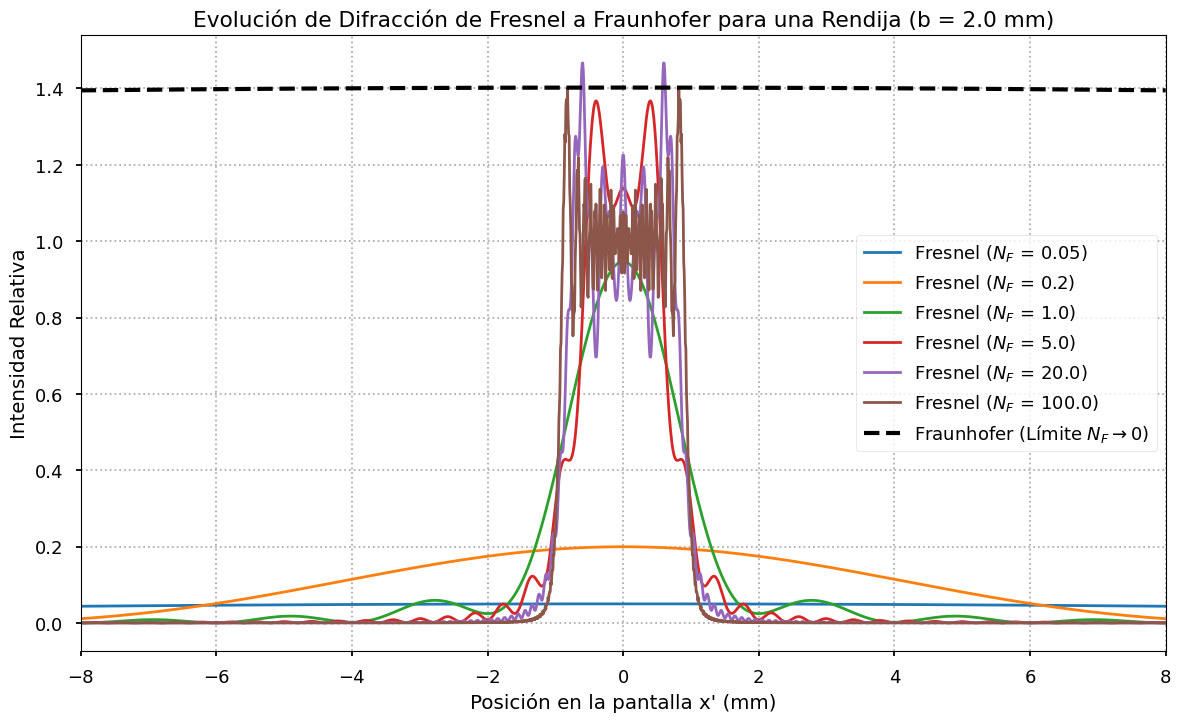

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel

# --- PARÁMETROS FIJOS DE LA SIMULACIÓN ---
# Ancho de la rendija (en metros)
b = 2e-3  # 1 mm
# Longitud de onda de la luz (verde)
lambda_ = 592-9 # 532 nm

# --- PARÁMETROS DE LA EVOLUCIÓN ---
# Lista de Números de Fresnel para simular.
# NF grande = Cerca (Fresnel puro). NF pequeño = Lejos (casi Fraunhofer).
fresnel_numbers = [0.05, 
    0.2,   
    1.0,   
    5.0,   
    20.0,  
    100.0 
]





# --- CONFIGURACIÓN DE LA PANTALLA DE OBSERVACIÓN ---
# Coordenadas en la pantalla donde se medirá la intensidad
# Ajustamos el tamaño de la pantalla para ver bien el patrón central
screen_width = 8 * b
x_prime = np.linspace(-screen_width / 2, screen_width / 2, 2000)

# --- INICIO DE LA GRÁFICA ---
plt.style.use('seaborn-v0_8-talk')
fig, ax = plt.subplots(figsize=(14, 8))

# --- BUCLE PRINCIPAL: CALCULAR PARA CADA NÚMERO DE FRESNEL ---
for nf in fresnel_numbers:
    # 1. Calcular la distancia D correspondiente al número de Fresnel
    # Usamos la definición NF = b^2 / (lambda * D)
    D = b**2 / (lambda_ * nf)
    
    # 2. Calcular los límites de integración u1 y u2 para las integrales de Fresnel
    # Se asume una onda plana incidente (fuente en el infinito)
    u_factor = np.sqrt(2 / (lambda_ * D))
    u1 = u_factor * (x_prime - b / 2)
    u2 = u_factor * (x_prime + b / 2)
    
    # 3. Calcular las integrales de Fresnel usando la librería SciPy
    # fresnel() devuelve S(u) y C(u)
    S1, C1 = fresnel(u1)
    S2, C2 = fresnel(u2)
    
    # 4. Calcular la intensidad del patrón de Fresnel
    # I = I_0/2 * [ (C(u2)-C(u1))^2 + (S(u2)-S(u1))^2 ]
    intensity_fresnel = 0.5 * ((C2 - C1)**2 + (S2 - S1)**2)
    
    # 5. Graficar el resultado
    ax.plot(x_prime * 1e3, intensity_fresnel, label=f'Fresnel ($N_F$ = {nf})', lw=2)

# --- COMPARACIÓN CON LA DIFRACCIÓN DE FRAUNHOFER ---
# La difracción de Fraunhofer es el límite cuando D -> inf (NF -> 0)
# Su forma es una función sinc^2
D_far_field = b**2 / (lambda_ * 0.01) # Usamos un D muy grande para la escala
sinc_arg = (np.pi * b * x_prime) / (lambda_ * D_far_field)
intensity_fraunhofer = (np.sinc(sinc_arg / np.pi))**2 # np.sinc(x) = sin(pi*x)/(pi*x)

# Se normaliza para que el pico coincida con el caso de NF más bajo
peak_fresnel_far = np.max(intensity_fresnel) # Pico del último patrón de Fresnel calculado
intensity_fraunhofer *= peak_fresnel_far

ax.plot(x_prime * 1e3, intensity_fraunhofer, 'k--', label='Fraunhofer (Límite $N_F \\to 0$)', lw=3)


# --- FORMATO FINAL DE LA GRÁFICA ---
ax.set_xlabel("Posición en la pantalla x' (mm)")
ax.set_ylabel("Intensidad Relativa")
ax.set_title(f'Evolución de Difracción de Fresnel a Fraunhofer para una Rendija (b = {b*1e3} mm)')
ax.legend()
ax.grid(True, linestyle=':')
ax.set_xlim(-screen_width/2 * 1e3, screen_width/2 * 1e3)
plt.show()

### borde recto

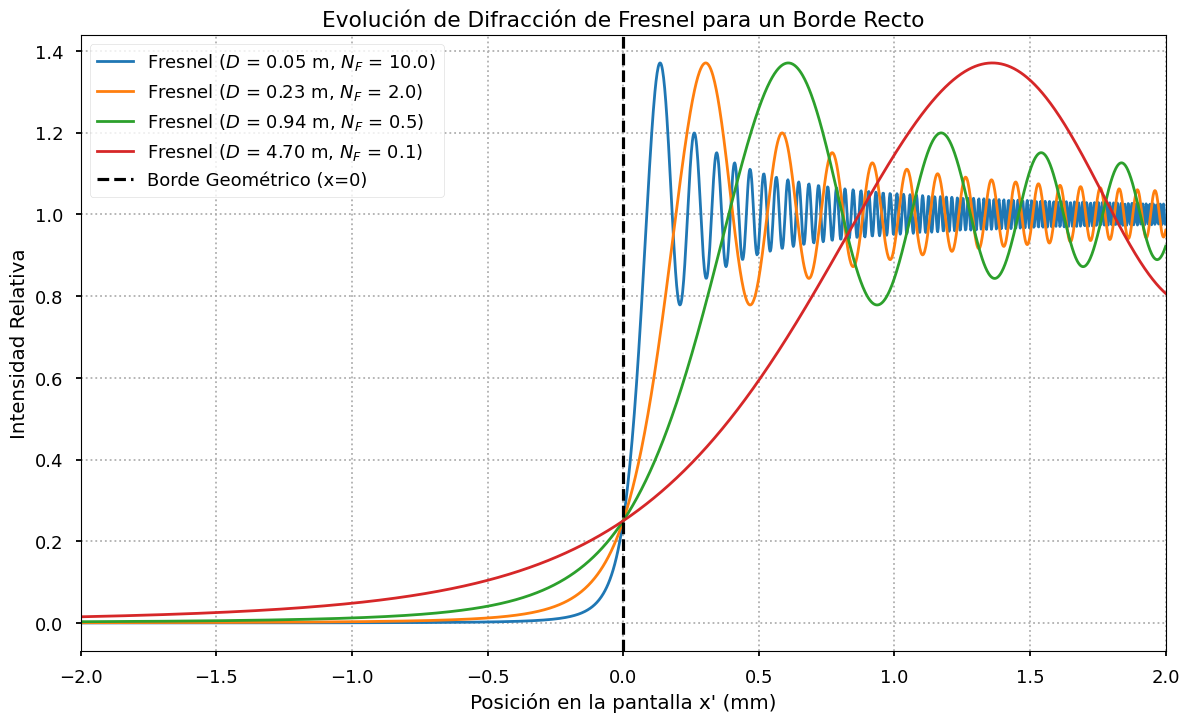

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel

# --- PARÁMETROS FIJOS DE LA SIMULACIÓN ---
# Longitud de onda de la luz (verde)
lambda_ = 532e-9 # 532 nm
# Ancho característico para definir el Número de Fresnel (ej. el ancho de la zona de interés)
# A diferencia de la rendija, el borde no tiene un ancho "b", así que definimos uno de referencia.
x_char = 0.5e-3 # 0.5 mm

# --- PARÁMETROS DE LA EVOLUCIÓN ---
# Lista de Números de Fresnel para simular.
fresnel_numbers = [10.0, 2.0, 0.5, 0.1]

# --- CONFIGURACIÓN DE LA PANTALLA DE OBSERVACIÓN ---
# El borde está en x'=0. Observamos a ambos lados.
screen_width = 8 * x_char
x_prime = np.linspace(-screen_width / 2, screen_width / 2, 2000)

# --- INICIO DE LA GRÁFICA ---
plt.style.use('seaborn-v0_8-talk')
fig, ax = plt.subplots(figsize=(14, 8))

# --- BUCLE PRINCIPAL: CALCULAR PARA CADA NÚMERO DE FRESNEL ---
for nf in fresnel_numbers:
    # 1. Calcular la distancia D correspondiente al número de Fresnel
    # Usamos la definición NF = x_char^2 / (lambda * D)
    D = x_char**2 / (lambda_ * nf)
    
    # 2. Calcular el argumento 'u' para la integral de Fresnel
    # Para un borde en x=0 y onda plana incidente
    u = x_prime * np.sqrt(2 / (lambda_ * D))
    
    # 3. Calcular las integrales de Fresnel
    S_u, C_u = fresnel(u)
    
    # 4. Calcular la intensidad del patrón de Fresnel para un borde
    # I = I_0/2 * [ (C(u) - C(-inf))^2 + (S(u) - S(-inf))^2 ]
    # Sabiendo que C(-inf) = S(-inf) = -0.5
    intensity_fresnel = 0.5 * ((C_u + 0.5)**2 + (S_u + 0.5)**2)
    
    # 5. Graficar el resultado
    ax.plot(x_prime * 1e3, intensity_fresnel, label=f'Fresnel ($D$ = {D:.2f} m, $N_F$ = {nf})', lw=2)


# --- FORMATO FINAL DE LA GRÁFICA ---
ax.axvline(0, color='k', linestyle='--', label='Borde Geométrico (x=0)')
ax.set_xlabel("Posición en la pantalla x' (mm)")
ax.set_ylabel("Intensidad Relativa")
ax.set_title(f'Evolución de Difracción de Fresnel para un Borde Recto')
ax.legend()
ax.grid(True, linestyle=':')
ax.set_xlim(-screen_width/2 * 1e3, screen_width/2 * 1e3)
plt.show()

## notebooklm


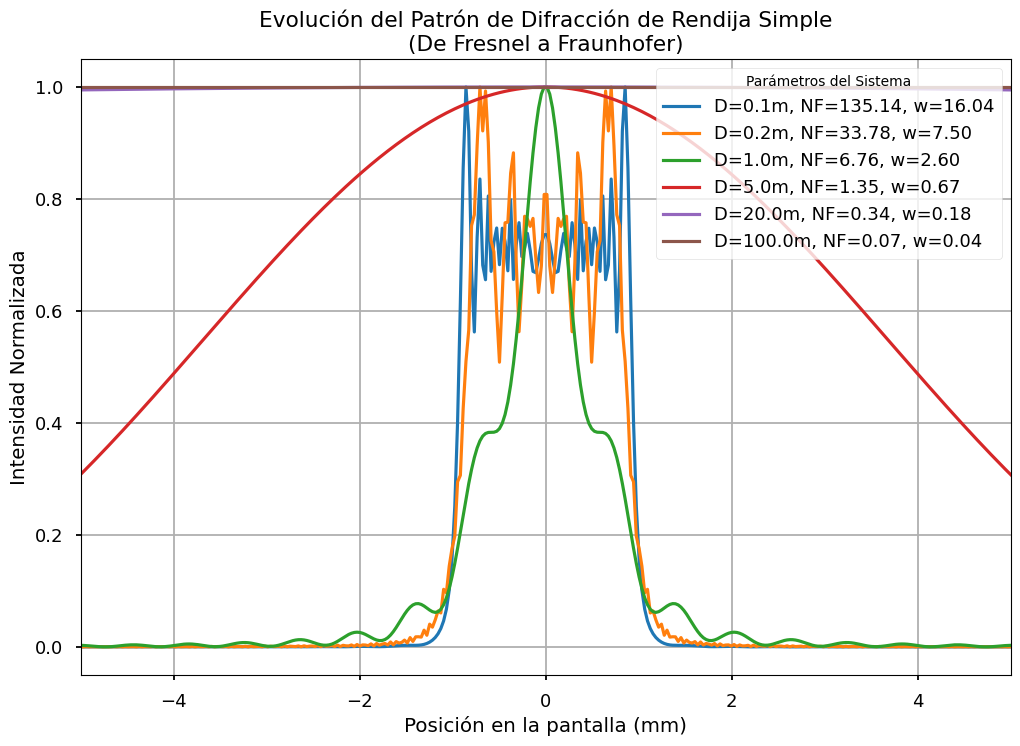

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel

# Constantes del documento
lambda_val = 592e-9  # Longitud de onda en metros (592 nm) [1, 2]
d_val = 1.0          # Distancia de la fuente a la rendija en metros (d = 1 m) [1, 2]
b_val = 2.0e-3       # Ancho de la rendija en metros (b = 2 mm) [2]

# Rango espacial para la pantalla de observación (x_M en el documento)
x_M = np.linspace(-0.015, 0.015, 1000)  # De -1.5 cm a 1.5 cm

plt.figure(figsize=(12, 8))

# Distancias de la rendija a la pantalla (D) para mostrar la evolución.
# A mayor D, menor NF, acercándose al régimen de Fraunhofer.
# A menor D, mayor NF, en el régimen de Fresnel.
D_vals = [
    0.05,  # D = 0.05m (NF ~ 13.5, claramente Fresnel)
    0.2,   # D = 0.2m (NF ~ 3.4, Fresnel)
    1.0,   # D = 1.0m (NF = 1.67, según [2], todavía Fresnel)
    5.0,   # D = 5.0m (NF ~ 0.34, acercándose a Fraunhofer)
    20.0,  # D = 20.0m (NF ~ 0.08, Fraunhofer)
    100.0  # D = 100.0m (NF ~ 0.017, campo lejano Fraunhofer)
]

for D_val in D_vals:
    # Calcular el número de Fresnel (NF = b^2 / (λD)) [18, conversación]
    NF = (b_val**2) / (lambda_val * D_val)

    # Calcular la constante K = sqrt(2d / (D(d+D)λ)) según la ecuación 11.24 en [3]
    K = np.sqrt(2 * d_val / (D_val * (d_val + D_val) * lambda_val))

    # Calcular el parámetro 'w' relacionado con la Clotoide, w = b * K según [3] y [conversación]
    w_val = b_val * K

    # Calcular los límites de integración u1 y u2 para cada punto x_M
    # Estos límites se basan en la forma u = K * x, donde x es la posición relativa a la mitad de la rendija [3]
    u1 = K * (x_M - b_val / 2)
    u2 = K * (x_M + b_val / 2)

    # Calcular las Integrales de Fresnel C(u) y S(u)
    Cu1, Su1 = fresnel(u1)
    Cu2, Su2 = fresnel(u2)

    # Calcular la Intensidad de la luz [4, 5]: I = (1/2) * [(C(u2) - C(u1))^2 + (S(u2) - S(u1))^2]
    intensity = 0.5 * ((Cu2 - Cu1)**2 + (Su2 - Su1)**2)

    # Normalizar la intensidad con respecto al máximo de cada curva.
    # Esto permite visualizar claramente la evolución de la forma del patrón.
    intensity_norm = intensity / np.max(intensity)

    plt.plot(x_M * 1000, intensity_norm,
             label=f'D={D_val:.1f}m, NF={NF:.2f}, w={w_val:.2f}')

plt.title('Evolución del Patrón de Difracción de Rendija Simple\n(De Fresnel a Fraunhofer)')
plt.xlabel('Posición en la pantalla (mm)')
plt.ylabel('Intensidad Normalizada')
plt.grid(True)
plt.legend(title='Parámetros del Sistema', loc='upper right')
plt.xlim([-5, 5])  # Acercar el zoom a la parte central del patrón para mejor detalle
plt.show()

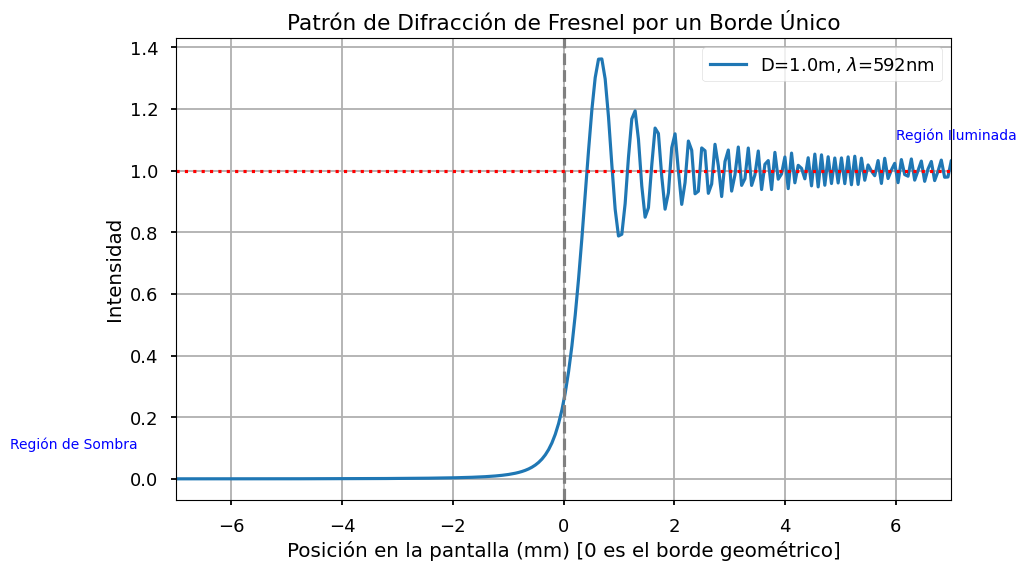

In [24]:
# Constantes del documento
lambda_val = 592e-9  # Longitud de onda en metros (592 nm) [1, 2]
D_val = 1.0          # Distancia del borde a la pantalla en metros (D = 1 m) [1]
# Nota: Para la difracción por un borde, la definición simplificada del parámetro 'u' en la fuente [6]
# asume que la fuente está a una distancia muy grande (d -> infinito).

# Rango espacial para la pantalla de observación (x_M en el documento)
# El origen (x_M = 0) representa la posición del borde geométrico.
# Se observa desde la región de sombra (x_M < 0) hacia la región iluminada (x_M > 0).
x_M_edge = np.linspace(-0.015, 0.015, 500) # De -1.5 cm a 1.5 cm

plt.figure(figsize=(10, 6))

# Calcular la abscisa curvilínea 'u' para cada punto x_M
# u = x_M * sqrt(2 / (lambda * D)) según la ecuación 11.25 en [6]
u = x_M_edge * np.sqrt(2 / (lambda_val * D_val))

# Calcular las Integrales de Fresnel C(u) y S(u)
Cu, Su = fresnel(u)

# Calcular la Intensidad para un borde. La fórmula utilizada en la fuente es:
# I = (1/2) * [ (C(u) + 0.5)^2 + (S(u) + 0.5)^2 ] [7]
# Esta fórmula asume la integración desde -infinito hasta u.
intensity_edge = 0.5 * ((Cu + 0.5)**2 + (Su + 0.5)**2)

# La intensidad no se normaliza explícitamente aquí para reflejar los valores absolutos
# y las características de sobreexcitación (picos > 1) mostradas en las figuras del documento
# para la difracción por un borde [6, 7]. La intensidad en la región totalmente iluminada
# (lejos del borde, x_M >> 0) tiende a 1.

plt.plot(x_M_edge * 1000, intensity_edge, label=f'D={D_val:.1f}m, $\\lambda$={lambda_val*1e9:.0f}nm')

plt.title('Patrón de Difracción de Fresnel por un Borde Único')
plt.xlabel('Posición en la pantalla (mm) [0 es el borde geométrico]')
plt.ylabel('Intensidad')
plt.grid(True)
plt.legend()
plt.axvline(x=0, color='gray', linestyle='--', label='Borde Geométrico')
plt.axhline(y=1, color='red', linestyle=':', label='Intensidad Geométrica (Asintótica)')
plt.text(0.006*1000, 1.1, 'Región Iluminada', color='blue')
plt.text(-0.01*1000, 0.1, 'Región de Sombra', color='blue')
plt.xlim([-7, 7]) # Ajustar el rango X para una mejor visualización del patrón
plt.show()


## difraccion 2D Fresnel

----------------------------------------
ANÁLISIS DE RÉGIMEN DE DIFRACCIÓN
  - Ancho (b): 0.8 mm  ->  N_F_x = 106.52
  - Alto  (h): 0.4 mm  ->  N_F_y = 26.63
----------------------------------------


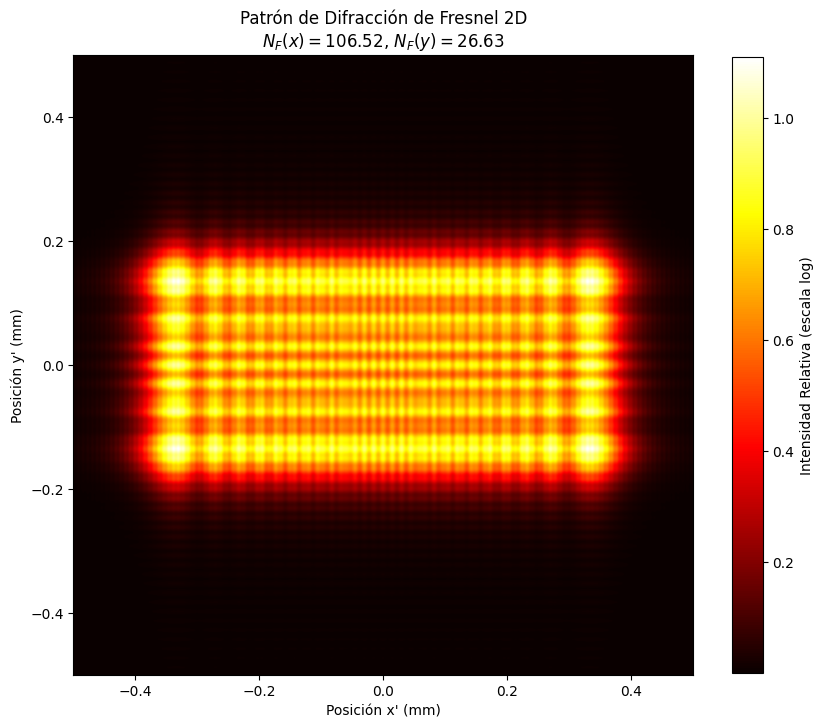

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel

def calculate_1d_fresnel_intensity(screen_coords, aperture_size, lambda_val, D_val):
    """
    Calcula el patrón de intensidad 1D de Fresnel para una rendija de tamaño dado.
    """
    # Calcular el argumento 'u' para las integrales de Fresnel
    u_factor = np.sqrt(2 / (lambda_val * D_val))
    u1 = u_factor * (screen_coords - aperture_size / 2)
    u2 = u_factor * (screen_coords + aperture_size / 2)
    
    # Calcular las integrales de Fresnel
    S1, C1 = fresnel(u1)
    S2, C2 = fresnel(u2)
    
    # Calcular la intensidad 1D
    intensity_1d = 0.5 * ((C2 - C1)**2 + (S2 - S1)**2)
    
    return intensity_1d

## --- PARÁMETROS MODIFICABLES ---

# 1. Parámetros geométricos de la rendija (en metros)
b = 0.8e-3  # Ancho de la rendija
h = 0.4e-3  # Alto de la rendija

# 2. Parámetros de la luz y la pantalla (en metros)
lambda_ = 600.8e-9 # Longitud de onda (láser He-Ne rojo)
D = 0.01            # Distancia de la rendija a la pantalla

# 3. Parámetros de la simulación
screen_size = 0.001 # Tamaño del área de visualización (1 cm)
N_points = 1024    # Resolución de la imagen

## --- VERIFICACIÓN DE NÚMEROS DE FRESNEL ---
NF_x = b**2 / (lambda_ * D)
NF_y = h**2 / (lambda_ * D)

print("-" * 40)
print("ANÁLISIS DE RÉGIMEN DE DIFRACCIÓN")
print(f"  - Ancho (b): {b*1e3} mm  ->  N_F_x = {NF_x:.2f}")
print(f"  - Alto  (h): {h*1e3} mm  ->  N_F_y = {NF_y:.2f}")
print("-" * 40)


## --- CÁLCULO DEL PATRÓN 2D ---

# Crear la malla de coordenadas 2D en la pantalla (x', y')
x_prime = np.linspace(-screen_size / 2, screen_size / 2, N_points)
y_prime = np.linspace(-screen_size / 2, screen_size / 2, N_points)
X_prime, Y_prime = np.meshgrid(x_prime, y_prime)

# Calcular el patrón de intensidad 1D para la dirección HORIZONTAL
intensity_x = calculate_1d_fresnel_intensity(X_prime, b, lambda_, D)

# Calcular el patrón de intensidad 1D para la dirección VERTICAL
intensity_y = calculate_1d_fresnel_intensity(Y_prime, h, lambda_, D)

# La intensidad 2D es el producto de las intensidades 1D
intensity_2d = intensity_x * intensity_y


## --- VISUALIZACIÓN ---

plt.style.use('default')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

# Se usa escala logarítmica para poder apreciar los detalles
im = ax.imshow(np.log1p(intensity_2d),
               cmap='hot',
               extent=[-screen_size/2*1e3, screen_size/2*1e3,
                       -screen_size/2*1e3, screen_size/2*1e3])

# Formato de la gráfica
ax.set_title(f'Patrón de Difracción de Fresnel 2D\n$N_F(x)={NF_x:.2f}$, $N_F(y)={NF_y:.2f}$')
ax.set_xlabel("Posición x' (mm)")
ax.set_ylabel("Posición y' (mm)")
fig.colorbar(im, ax=ax, label='Intensidad Relativa (escala log)', shrink=0.8)

plt.show()

## FFT punto 2

Dimensiones originales de la máscara: 330 x 329 píxeles.
El patrón de difracción completo calculado mide: 58.52 cm x 58.34 cm.
Calculando la FFT... (esto puede tardar un poco con padding alto)
Cálculo de FFT finalizado.


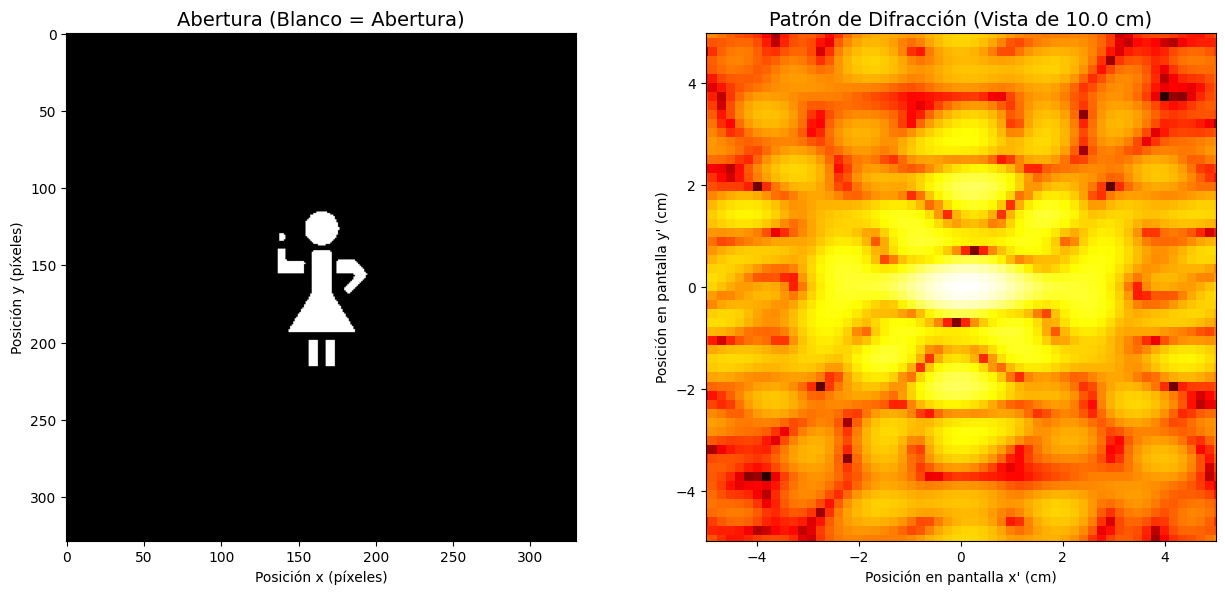

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import zoom

# --- 1. PARÁMETROS FÍSICOS Y DE SIMULACIÓN (MODIFICABLES) ---

# Ruta a tu imagen
image_path = 'images/imagen3.jpg'

# Factor de padding para suavizar la imagen final
factor_padding = 1

# Parámetros de la luz y la pantalla
lambda_ = 0.532e-6  # Longitud de onda (láser verde, en metros)
D = 0.5             # Distancia de la abertura a la pantalla (en metros)

# Parámetros de la abertura
aperture_physical_width = 150e-6 # El ancho físico de la imagen de la abertura en metros

# Parámetros de visualización
ancho_visualizacion_pantalla_m = 0.1 # 5 cm

# --- 2. CARGAR IMAGEN Y CREAR LA MÁSCARA DE ABERTURA ---

try:
    image_rgb = mpimg.imread(image_path)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{image_path}'.")
    exit()

# Convertir a escala de grises
image_gray = image_rgb[:, :, 0]
if np.max(image_gray) > 1:
    image_gray = image_gray / 255.0

# ⭐️ LÍNEA MODIFICADA ⭐️
# Ahora, los valores >= 0.5 (blancos y grises claros) se convierten en 1 (abertura).
# Los valores < 0.5 (negros y grises oscuros) se convierten en 0 (obstáculo).
aperture_mask = (image_gray >= 0.5).astype(float)
Ny, Nx = aperture_mask.shape
print(f"Dimensiones originales de la máscara: {Nx} x {Ny} píxeles.")

# Aplicar Zero-Padding
padded_mask = aperture_mask
if factor_padding > 1:
    print(f"Aplicando padding con un factor de {factor_padding}...")
    Ny_padded = int(Ny * factor_padding)
    Nx_padded = int(Nx * factor_padding)
    padded_mask = np.zeros((Ny_padded, Nx_padded))
    start_y = (Ny_padded - Ny) // 2
    start_x = (Nx_padded - Nx) // 2
    padded_mask[start_y : start_y + Ny, start_x : start_x + Nx] = aperture_mask
    print(f"Nuevas dimensiones con padding: {Nx_padded} x {Ny_padded} píxeles.")

# --- 3. CÁLCULOS FÍSICOS Y DE LA FFT ---

Ny_final, Nx_final = padded_mask.shape
dx = aperture_physical_width * factor_padding / Nx_final
screen_physical_width = (lambda_ * D) / dx
screen_physical_height = screen_physical_width * (Ny_final / Nx_final)
print(f"El patrón de difracción completo calculado mide: {screen_physical_width*100:.2f} cm x {screen_physical_height*100:.2f} cm.")

print("Calculando la FFT... (esto puede tardar un poco con padding alto)")
E_field = np.fft.fft2(padded_mask)
E_field_shifted = np.fft.fftshift(E_field)
intensity_pattern = np.abs(E_field_shifted)**2
print("Cálculo de FFT finalizado.")

# --- 4. VISUALIZACIÓN ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

# Gráfica 1: Abertura
ax1.imshow(padded_mask, cmap='gray')
ax1.set_title('Abertura (Blanco = Abertura)', fontsize=14)
ax1.set_xlabel('Posición x (píxeles)')
ax1.set_ylabel('Posición y (píxeles)')

# Gráfica 2: Patrón de difracción
log_intensity = np.log1p(intensity_pattern)
plot_extent = [-screen_physical_width/2 * 100, screen_physical_width/2 * 100, -screen_physical_height/2 * 100, screen_physical_height/2 * 100]
ax2.imshow(log_intensity, cmap='hot', extent=plot_extent)
ax2.set_title('Patrón de Difracción', fontsize=14)
ax2.set_xlabel("Posición en pantalla x' (cm)")
ax2.set_ylabel("Posición en pantalla y' (cm)")

if ancho_visualizacion_pantalla_m is not None:
    lim_cm = ancho_visualizacion_pantalla_m / 2 * 100
    view_height = ancho_visualizacion_pantalla_m * (screen_physical_height / screen_physical_width)
    lim_y_cm = view_height / 2 * 100
    ax2.set_xlim([-lim_cm, lim_cm])
    ax2.set_ylim([-lim_y_cm, lim_y_cm])
    ax2.set_title(f'Patrón de Difracción (Vista de {ancho_visualizacion_pantalla_m*100:.1f} cm)', fontsize=14)

plt.tight_layout()
plt.show()

Dimensiones originales de la máscara: 330 x 329 píxeles.
Rotando máscara por 45.0 grados...
Dimensiones después de rotar: 466 x 466 píxeles.
Aplicando padding con un factor de 4.0...
Dimensiones finales con padding: 1864 x 1864 píxeles.
Calculando la FFT...
Cálculo de FFT finalizado.


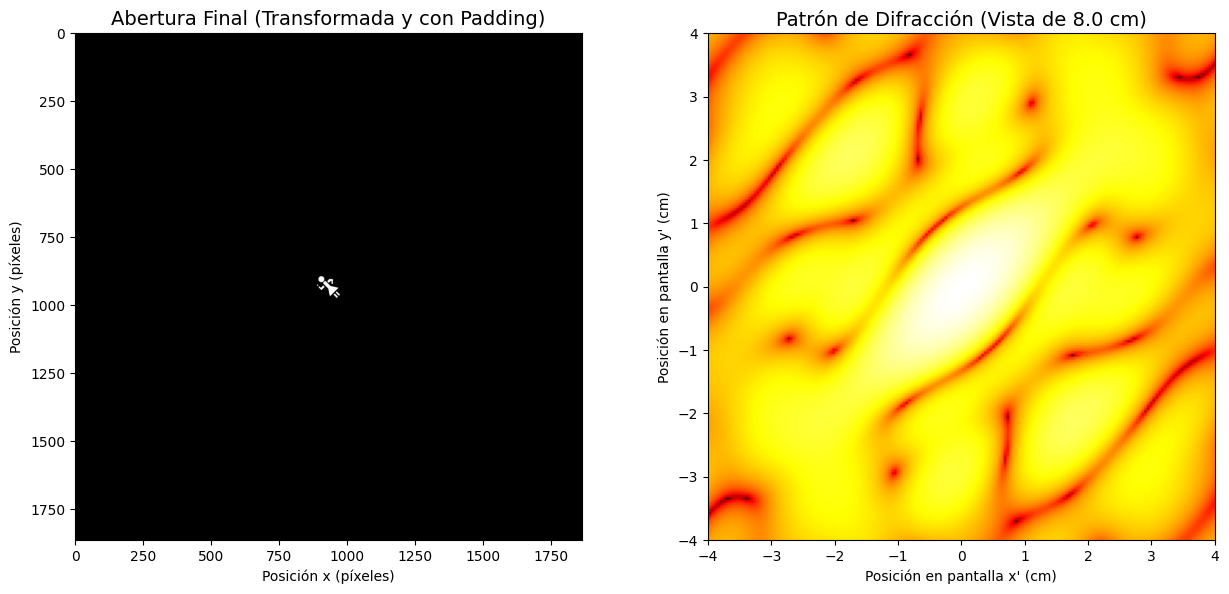

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.ndimage import zoom, rotate

# --- 1. PARÁMETROS DE PERSONALIZACIÓN Y SIMULACIÓN ---

# Ruta a tu imagen
image_path = 'images/imagen3.jpg'

# ⭐️ NUEVOS PARÁMETROS DE TRANSFORMACIÓN ⭐️
# Factor para ampliar o reducir la imagen. 1.0 = sin cambios, 2.0 = doble tamaño, 0.5 = mitad de tamaño.
factor_escala = 1.0
# Ángulo en grados para rotar la imagen. El giro es antihorario.
angulo_rotacion = 45.0 # Grados

# Factor de padding para suavizar la imagen final de la difracción.
factor_padding = 4.0

# Parámetros de la luz y la pantalla
lambda_ = 0.532e-6  # Longitud de onda (láser verde, en metros)
D = 0.5             # Distancia de la abertura a la pantalla (en metros)

# Parámetros físicos (el ancho físico se ajustará después del escalado)
aperture_physical_width_initial = 150e-6 # Ancho físico de la imagen ANTES de escalar

# Parámetros de visualización
ancho_visualizacion_pantalla_m = 0.08 # 8 cm

# --- 2. CARGA Y PROCESAMIENTO DE LA IMAGEN ---

try:
    image_rgb = mpimg.imread(image_path)
except FileNotFoundError:
    print(f"Error: No se encontró el archivo '{image_path}'.")
    exit()

# Convertir a escala de grises y binarizar (Blanco = Abertura)
image_gray = image_rgb[:, :, 0]
if np.max(image_gray) > 1:
    image_gray = image_gray / 255.0
mask_original = (image_gray >= 0.5).astype(float)
print(f"Dimensiones originales de la máscara: {mask_original.shape[1]} x {mask_original.shape[0]} píxeles.")


# --- 3. APLICAR TRANSFORMACIONES A LA MÁSCARA ---

mask_transformada = mask_original

# Paso 3.1: Escalar la máscara
if factor_escala != 1.0:
    print(f"Escalando máscara por un factor de {factor_escala}...")
    # order=0 (vecino más cercano) mantiene los bordes duros
    mask_transformada = zoom(mask_transformada, factor_escala, order=0)
    print(f"Dimensiones después de escalar: {mask_transformada.shape[1]} x {mask_transformada.shape[0]} píxeles.")

# Paso 3.2: Rotar la máscara (ya escalada)
if angulo_rotacion != 0:
    print(f"Rotando máscara por {angulo_rotacion} grados...")
    # reshape=True asegura que no se corten las esquinas
    mask_transformada = rotate(mask_transformada, angulo_rotacion, reshape=True, order=0)
    # Recortar a valores binarios por si la rotación introduce artefactos
    mask_transformada = (mask_transformada > 0.5).astype(float)
    print(f"Dimensiones después de rotar: {mask_transformada.shape[1]} x {mask_transformada.shape[0]} píxeles.")


# --- 4. APLICAR PADDING A LA MÁSCARA FINAL ---

Ny, Nx = mask_transformada.shape
padded_mask = mask_transformada

if factor_padding > 1:
    print(f"Aplicando padding con un factor de {factor_padding}...")
    Ny_padded = int(Ny * factor_padding)
    Nx_padded = int(Nx * factor_padding)
    padded_mask = np.zeros((Ny_padded, Nx_padded))
    start_y = (Ny_padded - Ny) // 2
    start_x = (Nx_padded - Nx) // 2
    padded_mask[start_y : start_y + Ny, start_x : start_x + Nx] = mask_transformada
    print(f"Dimensiones finales con padding: {padded_mask.shape[1]} x {padded_mask.shape[0]} píxeles.")


# --- 5. CÁLCULOS FÍSICOS Y DE LA FFT ---

Ny_final, Nx_final = padded_mask.shape
# El ancho físico ahora corresponde a la imagen escalada
aperture_physical_width_final = aperture_physical_width_initial * factor_escala
# El dx se calcula sobre el lienzo final con padding
dx = aperture_physical_width_final * factor_padding / Nx_final

screen_physical_width = (lambda_ * D) / dx
screen_physical_height = screen_physical_width * (Ny_final / Nx_final)

print("Calculando la FFT...")
E_field = np.fft.fft2(padded_mask)
E_field_shifted = np.fft.fftshift(E_field)
intensity_pattern = np.abs(E_field_shifted)**2
print("Cálculo de FFT finalizado.")

# --- 6. VISUALIZACIÓN ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))

ax1.imshow(padded_mask, cmap='gray')
ax1.set_title('Abertura Final (Transformada y con Padding)', fontsize=14)
ax1.set_xlabel('Posición x (píxeles)')
ax1.set_ylabel('Posición y (píxeles)')

log_intensity = np.log1p(intensity_pattern)
plot_extent = [-screen_physical_width/2 * 100, screen_physical_width/2 * 100, -screen_physical_height/2 * 100, screen_physical_height/2 * 100]
ax2.imshow(log_intensity, cmap='hot', extent=plot_extent)
ax2.set_title('Patrón de Difracción', fontsize=14)
ax2.set_xlabel("Posición en pantalla x' (cm)")
ax2.set_ylabel("Posición en pantalla y' (cm)")

if ancho_visualizacion_pantalla_m is not None:
    lim_cm = ancho_visualizacion_pantalla_m / 2 * 100
    view_height = ancho_visualizacion_pantalla_m * (screen_physical_height / screen_physical_width)
    lim_y_cm = view_height / 2 * 100
    ax2.set_xlim([-lim_cm, lim_cm])
    ax2.set_ylim([-lim_y_cm, lim_y_cm])
    ax2.set_title(f'Patrón de Difracción (Vista de {ancho_visualizacion_pantalla_m*100:.1f} cm)', fontsize=14)

plt.tight_layout()
plt.show()